### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%206-%20Deep%20Neural%20Networks/Module6_UnivariateTS_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 6- Deep Neural Networks with Tensorflow and Keras

# Installation

* If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
* If you want to run your code locally, then you need to install tensorflow first: https://www.tensorflow.org/install


In [1]:
import tensorflow 
tensorflow.__version__

'2.10.1'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
data.index = pd.to_datetime(data.index)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Making supervised ML/DL data

In [4]:
test_period = 24
train_period = len(data) - test_period

print(f"Train period: {train_period}")
print(f"Test period: {test_period}")

Train period: 120
Test period: 24


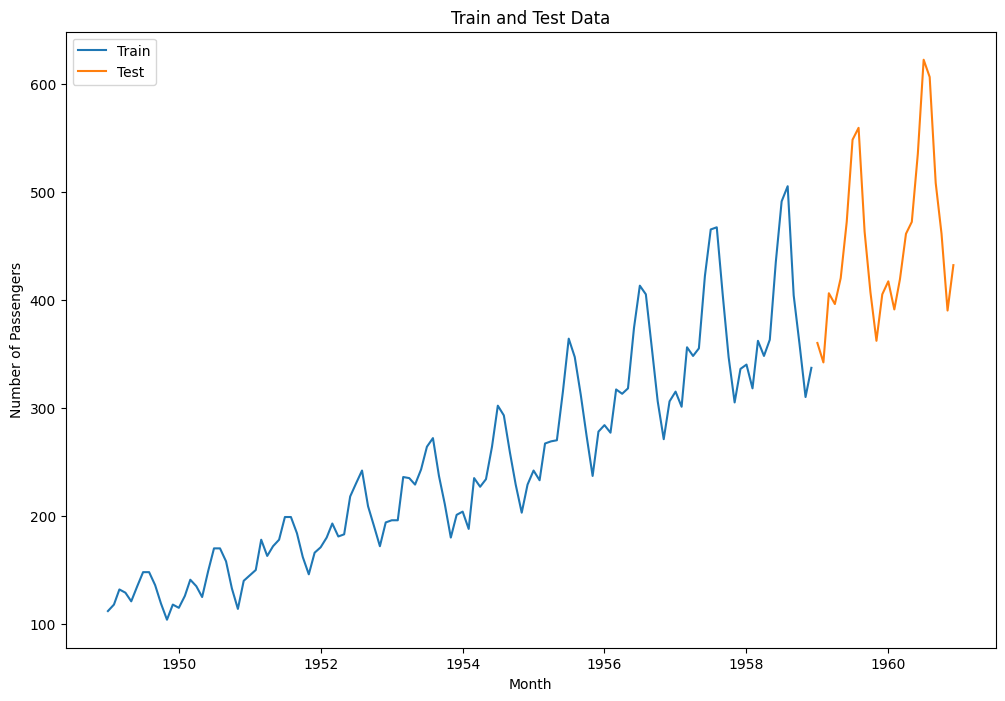

In [5]:
train = data.iloc[:train_period]
test = data.iloc[train_period:]

# plotting the train and test data with different colors
plt.figure(figsize=(12, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Train and Test Data')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [6]:
train.index[-1]

Timestamp('1958-12-01 00:00:00')

In [7]:
# A Boolean series indicating which rows of the DataFrame data belong to each set (train, test)
train_indicator = (data.index <= train.index[-1])
test_indicator =  (data.index > train.index[-1])

test_indicator

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [8]:
# creating feature space X and target variable y for the training and test datasets
series = data['Passengers'].dropna().to_numpy()
series

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [9]:
len(series)

144

In [10]:
Tx = 12 # Number of lags! using the past Tx observations to forecast the next one.
Ty = 1 #  Forecasting Ty outputs at once
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx-Ty+1)])
Y = np.array([series[t+Tx: t+Tx+Ty] for t in range(len(series) - Tx-Ty+1)])
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)

X: (132, 12) Y: (132, 1) N: 132


In [11]:
X[:-test_period].shape

(108, 12)

In [12]:
X[-test_period:].shape

(24, 12)

In [13]:
Xtrain, Ytrain = X[:-test_period], Y[:-test_period]
Xtest, Ytest = X[-test_period:], Y[-test_period:]

# printing shapes
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(108, 12) (108, 1) (24, 12) (24, 1)


## DNN model

We start from a very simple DNN architecture, later in the course we will improve this by RNN and LSTM. 

In [14]:
# creating the DNN model using functional API and build model function. 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_model(Tx, Ty):
    i = Input(shape=(Tx,))
    x = Dense(32, activation='relu')(i)
    x = Dense(16, activation='relu')(x)
    output = Dense(Ty , activation = 'linear')(x)
    model = Model(i, output)
    model.compile(loss='mse', optimizer='adam')
    return model

In [15]:
#Tx = 12 # number of lags
#Ty = 1
model_DNN = build_model(Tx, Ty)
model_DNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [16]:
# training the model 
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_DNN.fit(Xtrain, Ytrain, epochs=100, batch_size=16, validation_data=(Xtest, Ytest))


Epoch 1/100
7/7 [==============================] - 1s 13ms/step - loss: 54134.8281 - val_loss: 91010.6484
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 22250.4238 - val_loss: 26856.7969
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 5595.0513 - val_loss: 5481.2036
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 1747.2883 - val_loss: 6815.1328
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 2694.2876 - val_loss: 7048.8071
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 2152.0247 - val_loss: 4249.5107
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 1409.1835 - val_loss: 3367.5488
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 1236.1802 - val_loss: 3376.5898
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 1216.9586 - val_loss: 3104.3196
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - lo

In [17]:
# creating loss dataframe
loss_df = pd.DataFrame(model_DNN.history.history)
loss_df.head()

,loss,val_loss
0,54134.828125,91010.648438
1,22250.423828,26856.796875
2,5595.051270,5481.203613
3,1747.288330,6815.132812
4,2694.287598,7048.807129


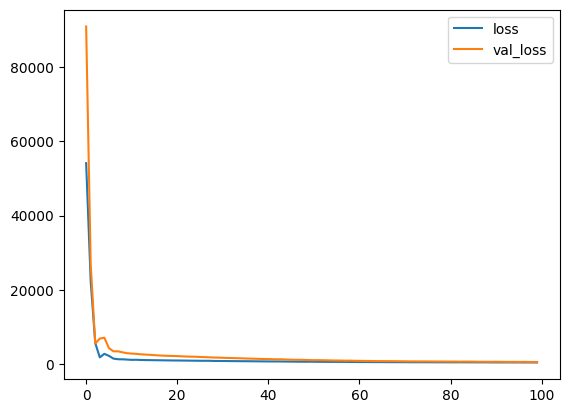

In [18]:
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

## One step ahead forecast

At each point in time (either in train or test set) we have access to the past Tx lags actual observations. 

In [19]:
train_indicator[:Tx] = False # the first Tx values are not predictable.
# because we need Tx lags to predict the next value

In [20]:
train_indicator

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

In [21]:
test_indicator

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [22]:
# making predictions with model_DNN
DNN_1step_train_forecast = model_DNN.predict(Xtrain)
DNN_1step_test_forecast = model_DNN.predict(Xtest)

1/1 [==============================] - 0s 9ms/step


In [23]:
DNN_1step_train_forecast.shape

(108, 1)

In [24]:
DNN_1step_test_forecast.shape

(24, 1)

In [25]:
# plotting one step ahead forecast

data.loc[train_indicator, '1step_train_forecast'] = DNN_1step_train_forecast
data.loc[test_indicator, '1step_test_forecast'] = DNN_1step_test_forecast
data.head(15)

,Passengers,1step_train_forecast,1step_test_forecast
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,NaN,NaN
1949-07-01,148,NaN,NaN
1949-08-01,148,NaN,NaN
1949-09-01,136,NaN,NaN


In [26]:
data.tail()

,Passengers,1step_train_forecast,1step_test_forecast
Month,,,
1960-08-01,606,NaN,610.211365
1960-09-01,508,NaN,536.227234
1960-10-01,461,NaN,458.297119
1960-11-01,390,NaN,428.844727
1960-12-01,432,NaN,418.276978


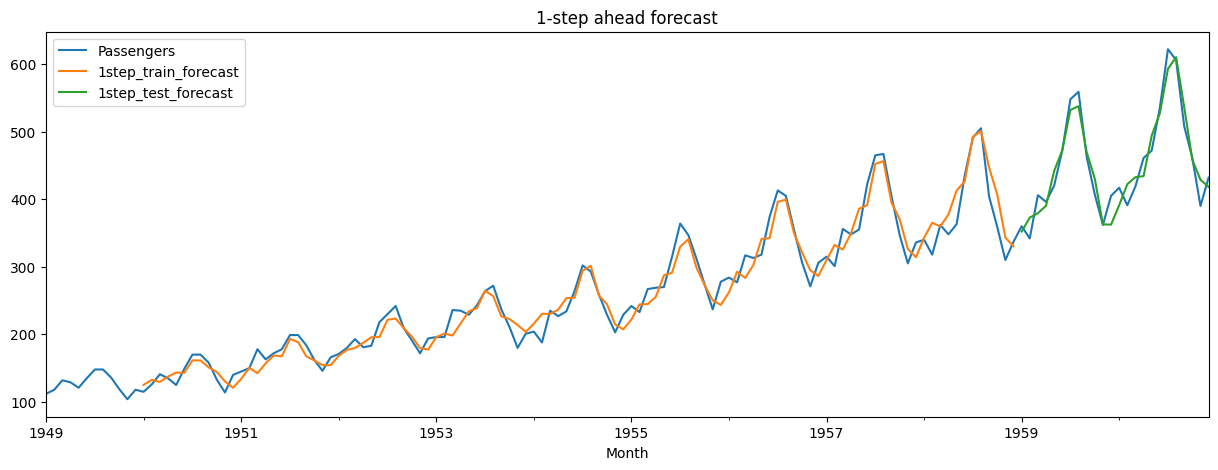

In [27]:
# plot 1-step forecast
data[['Passengers', '1step_train_forecast', '1step_test_forecast']].plot(figsize=(15, 5))
plt.title('1-step ahead forecast')
plt.show()


## Multi-step Forecast

At each point in time, we have access to the Tx lag observations only in the train set. For the test set however, we need to create the lag terms based on previous predictions, that's why we cannot use model.fit(X_test) for multi-step predictions. We need to generate a sequence of predictions for test_period steps into the future. 

These predictions can then be used to evaluate the performance of the model over this period.

In [28]:
Xtest.shape

(24, 12)

In [29]:
Xtest[0].shape

(12,)

In [30]:
Xtest[0].reshape(1, -1).shape

(1, 12)

In [31]:
train.tail()

,Passengers
Month,
1958-08-01,505
1958-09-01,404
1958-10-01,359
1958-11-01,310
1958-12-01,337


In [32]:
Xtest[0]

array([340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337],
      dtype=int64)

In [33]:
input_X = Xtest[0]
prediction = model_DNN.predict(input_X.reshape(1, -1))[0]
print(prediction)


1/1 [==============================] - 0s 13ms/step
[351.93802]


In [34]:
test.head()

,Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420


In [35]:
input_X = np.roll(input_X, -1)
input_X[-1] = prediction
print(input_X)

[318 362 348 363 435 491 505 404 359 310 337 351]


In [36]:
multistep_predictions = []

# first test input
input_X = Xtest[0]

# Start a loop that will continue until we have the desired number of future forecasts (test_period).
while len(multistep_predictions) < test_period:
  prediction = model_DNN.predict(input_X.reshape(1, -1))[0]
  
  # update the predictions list
  multistep_predictions.append(prediction)

  # update the new input
  # The input_X array, which serves as input for the next prediction, is updated. The np.roll(input_X, -1) shifts all elements of input_X one position to the left. 
  # The last element of last_x, which is now freed up, is filled with the last prediction p.
  input_X = np.roll(input_X, -1)
  input_X[-1] = prediction

1/1 [==============================] - 0s 9ms/step


In [37]:
multistep_predictions

[array([351.93802], dtype=float32),
 array([370.6592], dtype=float32),
 array([384.23132], dtype=float32),
 array([389.01178], dtype=float32),
 array([432.45074], dtype=float32),
 array([481.96295], dtype=float32),
 array([535.5926], dtype=float32),
 array([524.728], dtype=float32),
 array([476.81366], dtype=float32),
 array([413.32184], dtype=float32),
 array([361.86005], dtype=float32),
 array([369.4745], dtype=float32),
 array([390.99762], dtype=float32),
 array([412.20398], dtype=float32),
 array([423.732], dtype=float32),
 array([441.9164], dtype=float32),
 array([488.13605], dtype=float32),
 array([523.3575], dtype=float32),
 array([573.4971], dtype=float32),
 array([574.5178], dtype=float32),
 array([539.5429], dtype=float32),
 array([467.37323], dtype=float32),
 array([408.41833], dtype=float32),
 array([417.96738], dtype=float32)]

In [38]:
# save multi-step forecast to dataframe
data.loc[test_indicator, 'multistep_test_forecast'] = multistep_predictions
data.tail()

,Passengers,1step_train_forecast,1step_test_forecast,multistep_test_forecast
Month,,,,
1960-08-01,606,NaN,610.211365,574.517822
1960-09-01,508,NaN,536.227234,539.542908
1960-10-01,461,NaN,458.297119,467.373230
1960-11-01,390,NaN,428.844727,408.418335
1960-12-01,432,NaN,418.276978,417.967377


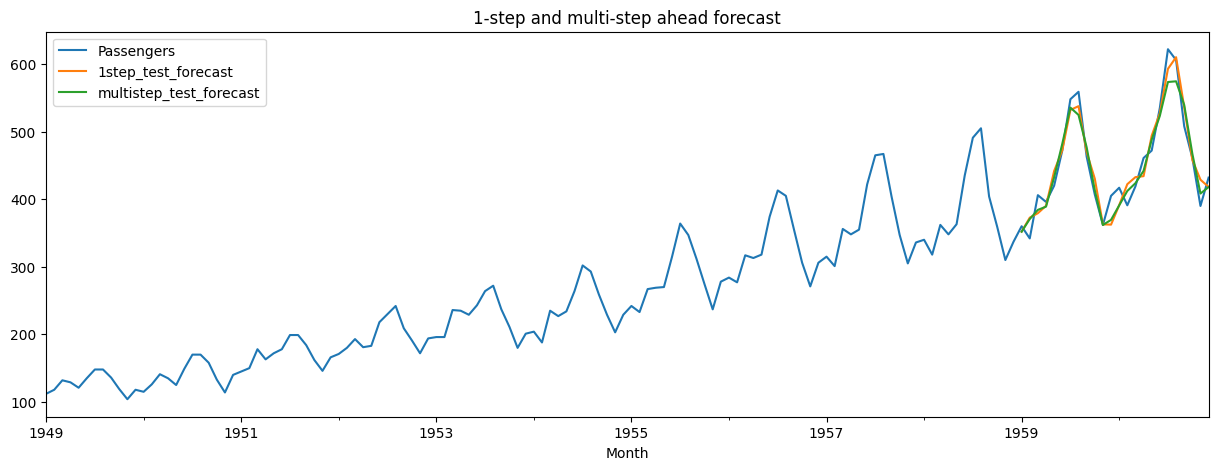

In [39]:
# plot 1-step and multi-step forecast
data[['Passengers', '1step_test_forecast', 'multistep_test_forecast']].plot(figsize=(15, 5))
plt.title('1-step and multi-step ahead forecast')
plt.show()


# Multi-output forecast 

In [40]:
# Make multi-output supervised dataset
Tx = 12 # recall: using the past Tx lag observations to forecast the next one.
Ty = test_period # number of outputs forecasted at once

# Create input-output pairs
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx - Ty+1)])
Y = np.array([series[t+Tx:t+Tx+Ty] for t in range(len(series) - Tx - Ty+1)])
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)


X: (109, 12) Y: (109, 24) N: 109


In [41]:
series[0:36]

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166], dtype=int64)

In [42]:
X[0]

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118],
      dtype=int64)

In [43]:
Y[0]

array([115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145,
       150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166], dtype=int64)

In [44]:
X[:-1].shape

(108, 12)

In [45]:
Xtrain_mo, Ytrain_mo = X[:-1], Y[:-1] 
Xtest_mo, Ytest_mo = X[-1:], Y[-1:] # this is the last observation from data which we use to forecast the future

In [46]:
# print the shapes
print(Xtrain_mo.shape, Ytrain_mo.shape, Xtest_mo.shape, Ytest_mo.shape)

(108, 12) (108, 24) (1, 12) (1, 24)


In [47]:
print(f'Tx: {Tx}, Ty: {Ty}')

Tx: 12, Ty: 24


In [48]:
#Tx = 12 # number of lags
#Ty = 24 # number of outputs forecasted at once
model_DNN_mo = build_model(Tx, Ty)
model_DNN_mo.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_3 (Dense)             (None, 32)                416       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 24)                408       
                                                                 
Total params: 1,352
Trainable params: 1,352
Non-trainable params: 0
_________________________________________________________________


In [49]:
# training the model 
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_DNN_mo.fit(Xtrain_mo, Ytrain_mo, epochs=200, batch_size=16, validation_data=(Xtest_mo, Ytest_mo))


Epoch 1/200
7/7 [==============================] - 0s 10ms/step - loss: 80090.2031 - val_loss: 163260.9219
Epoch 2/200
7/7 [==============================] - 0s 3ms/step - loss: 69814.6172 - val_loss: 143030.9844
Epoch 3/200
7/7 [==============================] - 0s 3ms/step - loss: 61386.2461 - val_loss: 124055.9453
Epoch 4/200
7/7 [==============================] - 0s 3ms/step - loss: 52628.2734 - val_loss: 102712.2578
Epoch 5/200
7/7 [==============================] - 0s 3ms/step - loss: 44265.2969 - val_loss: 80964.3438
Epoch 6/200
7/7 [==============================] - 0s 3ms/step - loss: 36093.5508 - val_loss: 63916.6914
Epoch 7/200
7/7 [==============================] - 0s 3ms/step - loss: 29855.1426 - val_loss: 51326.5195
Epoch 8/200
7/7 [==============================] - 0s 3ms/step - loss: 24648.5996 - val_loss: 40959.5703
Epoch 9/200
7/7 [==============================] - 0s 3ms/step - loss: 19987.2969 - val_loss: 32473.0469
Epoch 10/200
7/7 [==============================] 

In [50]:
loss_df = pd.DataFrame(model_DNN_mo.history.history)
loss_df.head()

,loss,val_loss
0,80090.203125,163260.921875
1,69814.617188,143030.984375
2,61386.246094,124055.945312
3,52628.273438,102712.257812
4,44265.296875,80964.343750


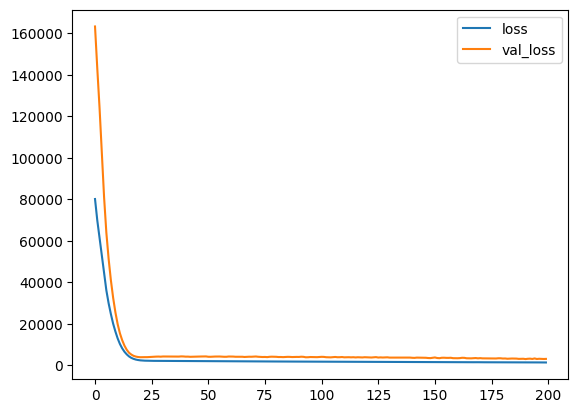

In [51]:
# visualize the loss
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

In [52]:
# making predictions with model_DNN_mo
DNN_mo_train_forecast = model_DNN_mo.predict(Xtrain_mo)
DNN_mo_test_forecast = model_DNN_mo.predict(Xtest_mo) # because we are forecasting multi-output at once, we can use the model.predict(X_test)

# printing the shapes
print(DNN_mo_train_forecast.shape, DNN_mo_test_forecast.shape)

1/1 [==============================] - 0s 9ms/step
(108, 24) (1, 24)


In [53]:
DNN_mo_test_forecast

array([[337.06857, 420.21008, 328.4924 , 346.88205, 390.4273 , 488.15845,
        490.87094, 487.99054, 466.40472, 445.19003, 378.36295, 437.2485 ,
        419.61823, 442.14984, 391.3797 , 483.5375 , 430.61966, 541.1262 ,
        438.08557, 549.8068 , 494.08063, 484.7604 , 433.47794, 440.51205]],
      dtype=float32)

In [54]:
# save multi-output forecast to dataframe
data.loc[test_indicator, 'multioutput_test_forecast'] = DNN_mo_test_forecast[0]
data.tail()

,Passengers,1step_train_forecast,1step_test_forecast,multistep_test_forecast,multioutput_test_forecast
Month,,,,,
1960-08-01,606,NaN,610.211365,574.517822,549.806824
1960-09-01,508,NaN,536.227234,539.542908,494.080627
1960-10-01,461,NaN,458.297119,467.373230,484.760406
1960-11-01,390,NaN,428.844727,408.418335,433.477936
1960-12-01,432,NaN,418.276978,417.967377,440.512054


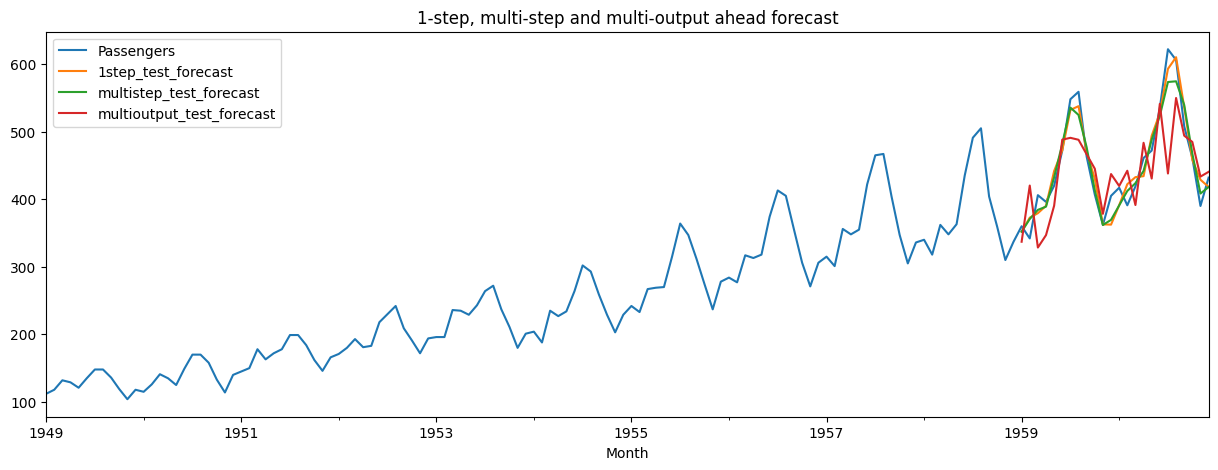

In [55]:
# plot 1-step and multi-step forecast along with multi-output forecast
data[['Passengers', '1step_test_forecast', 'multistep_test_forecast', 'multioutput_test_forecast' ]].plot(figsize=(15, 5))
plt.title('1-step, multi-step and multi-output ahead forecast')
plt.show()

# Forecast comparison

In [60]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error

passenger_test = data.loc[test_indicator, 'Passengers']
mape1 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, '1step_test_forecast'])
mape2 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, 'multistep_test_forecast'])
mape3 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, 'multioutput_test_forecast'])
print("1step_test MAE:", mape1)
print("multi-step MAE:", mape2)
print("multi-output MAE:", mape3)

1step_test MAE: 0.042962837875737105
multi-step MAE: 0.039850539331945455
multi-output MAE: 0.08828439286394714


## DL_ts_forecaster

In [57]:
# putting everything together for the one-step and multi-step forecasts in a function

# creating the DNN model using functional API and build model function. 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


def dl_ts_forecaster(data, target, lags, fh, model_name='DNN'):

    series = data[target].dropna().to_numpy()

    Tx = lags  
    Ty = 1 #  Forecasting Ty step ahead

    # Splitting the data
    test_period = fh
    train_period = len(data) - test_period
    train = data.iloc[:train_period]
    test = data.iloc[train_period:]

    # boolean series for train and test
    train_indicator = (data.index <= train.index[-1])
    test_indicator =  (data.index > train.index[-1])
    train_indicator[:Tx] = False # the first Tx values are not predictable.

    # making supervised data
    X = np.array([series[t:t+Tx] for t in range(len(series) - Tx-Ty+1)])
    Y = np.array([series[t+Tx+Ty-1] for t in range(len(series) - Tx-Ty+1)])
    Xtrain, Ytrain = X[:-test_period], Y[:-test_period]
    Xtest, Ytest = X[-test_period:], Y[-test_period:]

    # training the model
    i = Input(shape=(Tx,))
    x = Dense(32, activation='relu')(i)
    x = Dense(16, activation='relu')(x)
    output = Dense(Ty , activation = 'linear')(x)
    model = Model(i, output)
    model.compile(loss='mse', optimizer='adam')
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    model.fit(Xtrain, Ytrain, epochs=100, batch_size=16, validation_data=(Xtest, Ytest))

    # one-step ahead forecast
    data.loc[train_indicator, f'{model_name}_1step_train_forecast'] = model.predict(Xtrain)
    data.loc[test_indicator, f'{model_name}_1step_test_forecast'] = model.predict(Xtest)

    # multi-step ahead forecast
    multistep_predictions = []
    input_X = Xtest[0]
    while len(multistep_predictions) < test_period:
        prediction = model.predict(input_X.reshape(1, -1))[0]
        multistep_predictions.append(prediction)
        input_X = np.roll(input_X, -1)
        input_X[-1] = prediction

    data.loc[test_indicator, f'{model_name}_multistep_test_forecast'] = multistep_predictions

    # MAPE comparison 
    mape_1step = mean_absolute_percentage_error(data.loc[test_indicator, target], data.loc[test_indicator, f'{model_name}_1step_test_forecast'])
    mape_multiple_step = mean_absolute_percentage_error(data.loc[test_indicator, target], data.loc[test_indicator, f'{model_name}_multistep_test_forecast'])
    print(f"{model_name} 1-step MAPE:", mape_1step)
    print(f"{model_name} multi-step MAPE:", mape_multiple_step)

    # plot 1-step and multi-step forecast
    data[[target, f'{model_name}_1step_test_forecast', f'{model_name}_multistep_test_forecast']].plot(figsize=(15, 5))
    plt.title('1-step and multi-step ahead forecast')
    plt.show()

    return data

Epoch 1/100
7/7 [==============================] - 0s 11ms/step - loss: 97914.1328 - val_loss: 174513.8594
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 53852.7031 - val_loss: 79600.1875
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 20992.6895 - val_loss: 21505.6934
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 4753.4546 - val_loss: 5015.4155
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 2257.1550 - val_loss: 8840.6094
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 3458.3423 - val_loss: 7209.6245
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 1989.5107 - val_loss: 3836.4890
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 1771.5734 - val_loss: 4366.2700
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 1832.9869 - val_loss: 4015.4846
Epoch 10/100
7/7 [==============================] - 0s 4ms/step -

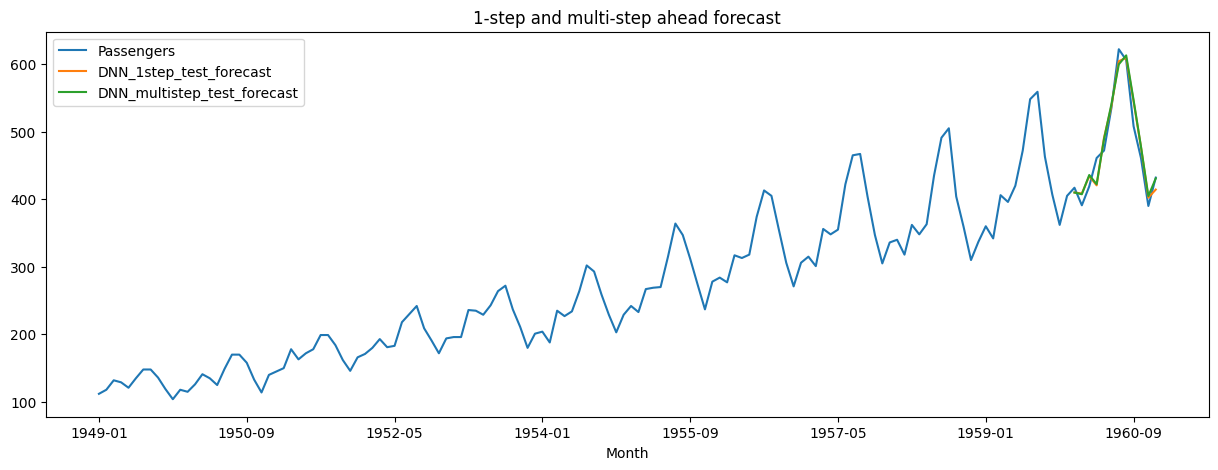

,Passengers,DNN_1step_train_forecast,DNN_1step_test_forecast,DNN_multistep_test_forecast
Month,,,,
1949-01,112,NaN,NaN,NaN
1949-02,118,NaN,NaN,NaN
1949-03,132,NaN,NaN,NaN
1949-04,129,NaN,NaN,NaN
1949-05,121,NaN,NaN,NaN
...,...,...,...,...
1960-08,606,NaN,609.364624,612.897339
1960-09,508,NaN,544.633362,546.713684
1960-10,461,NaN,477.284790,477.852478


In [58]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
dl_ts_forecaster(data=df, target='Passengers', lags=24, fh=12)

Epoch 1/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2854 - val_loss: 0.1980
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0768 - val_loss: 0.1562
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0586 - val_loss: 0.0670
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0371 - val_loss: 0.0445
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0276 - val_loss: 0.0269
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.0267
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0235 - val_loss: 0.0238
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0204 - val_loss: 0.0240
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0199 - val_loss: 0.0233
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0217 - val_loss: 0.0268
Epoch 11/100
8/8 [==========

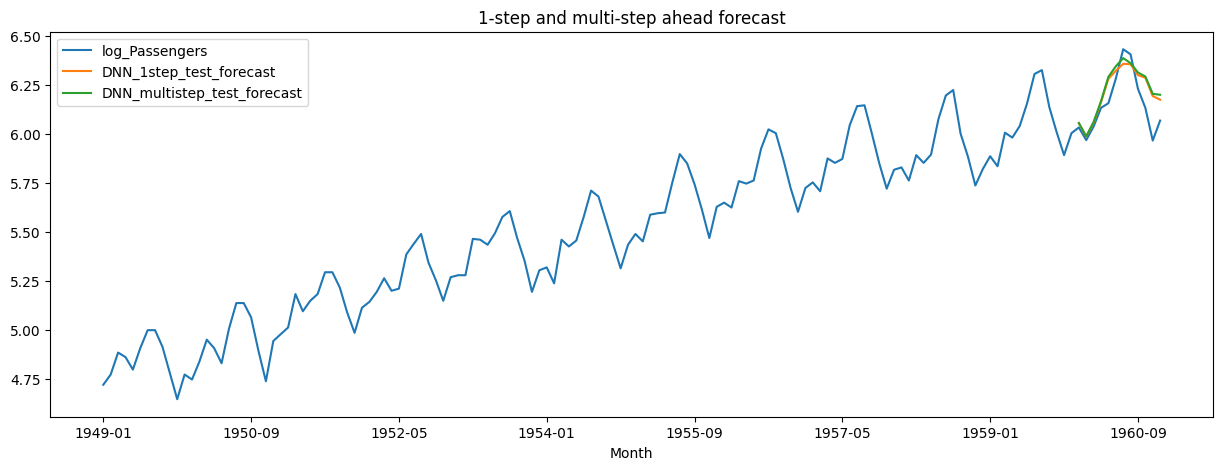

,Passengers,log_Passengers,DNN_1step_train_forecast,DNN_1step_test_forecast,DNN_multistep_test_forecast
Month,,,,,
1949-01,112,4.718499,NaN,NaN,NaN
1949-02,118,4.770685,NaN,NaN,NaN
1949-03,132,4.882802,NaN,NaN,NaN
1949-04,129,4.859812,NaN,NaN,NaN
1949-05,121,4.795791,NaN,NaN,NaN
...,...,...,...,...,...
1960-08,606,6.406880,NaN,6.356243,6.361756
1960-09,508,6.230481,NaN,6.300175,6.313943
1960-10,461,6.133398,NaN,6.287630,6.293718


In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
df['log_Passengers'] = np.log(df['Passengers'])
dl_ts_forecaster(data=df, target='log_Passengers', lags=12, fh=12)

# Done!